In [1]:
## loading packages
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg19.knownGene)
txdb <- TxDb.Hsapiens.UCSC.hg19.knownGene
library(clusterProfiler)


Loading required package: GenomicFeatures
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, mapply, match, mget, order,
    paste, pmax, pmax.int, pmin, pmin.int, Position, rank, rbind,
    Reduce, rownames, sapply, setdiff, sort, table, tapply, union,
    unique, unsplit

Loading required package: S4Vectors
Loading required package: stats4

Attaching package: ‘S4Vectors’

The following obj

In [2]:
peakFile = "./macs_out_highQuality/NANOG_ChIP_peaks.narrowPeak"
peakFile2 = "./macs_out_highQuality/OCT4_ChIP_peaks.narrowPeak"
peak_nanog <- readPeakFile("./macs_out_highQuality/NANOG_ChIP_peaks.narrowPeak",header=0)
peak_oct4 <- readPeakFile("./macs_out_highQuality/OCT4_ChIP_peaks.narrowPeak",header=0)
peak_nanog


GRanges object with 59660 ranges and 7 metadata columns:
          seqnames                 ranges strand |                    V4
             <Rle>              <IRanges>  <Rle> |              <factor>
      [1]     chr1     [ 713897,  714380]      * |     NANOG_ChIP_peak_1
      [2]     chr1     [ 780978,  781405]      * |     NANOG_ChIP_peak_2
      [3]     chr1     [ 840631,  841156]      * |     NANOG_ChIP_peak_3
      [4]     chr1     [ 877071,  877774]      * |     NANOG_ChIP_peak_4
      [5]     chr1     [1093396, 1093886]      * |     NANOG_ChIP_peak_5
      ...      ...                    ...    ... .                   ...
  [59656]     chrX [153609560, 153609984]      * | NANOG_ChIP_peak_56207
  [59657]     chrX [153991672, 153991992]      * | NANOG_ChIP_peak_56208
  [59658]     chrX [154049697, 154050763]      * | NANOG_ChIP_peak_56209
  [59659]     chrX [154357726, 154358117]      * | NANOG_ChIP_peak_56210
  [59660]     chrX [154907908, 154908252]      * | NANOG_ChIP_peak_

In [11]:
options(repr.plot.width=6, repr.plot.height=8)
par(ps = 8, cex.axis = 0.2)
chrp = covplot(peak_oct4, weightCol="V5")
#axis(2,cex.axis=0.2)

In [12]:
library(ggplot2)

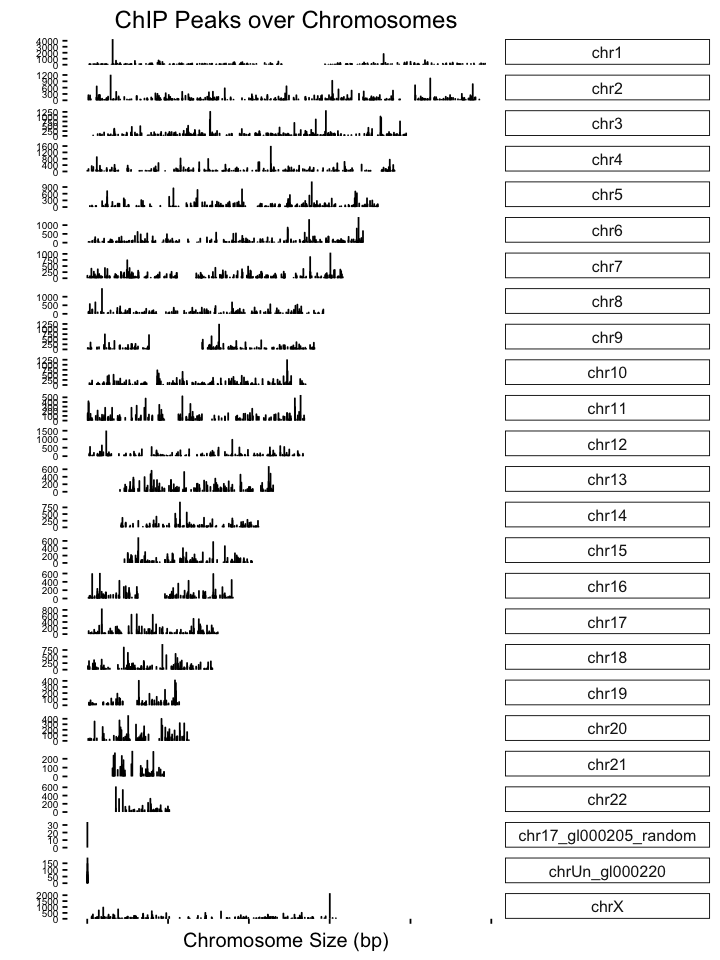

In [18]:
chrp = chrp+theme(text = element_text(size=12), axis.text.y  = element_text(size=6))
chrp

chr1_gl000192_random dosen't contain signal higher than 1
chr17_gl000204_random dosen't contain signal higher than 1
chr7_gl000195_random dosen't contain signal higher than 1
Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

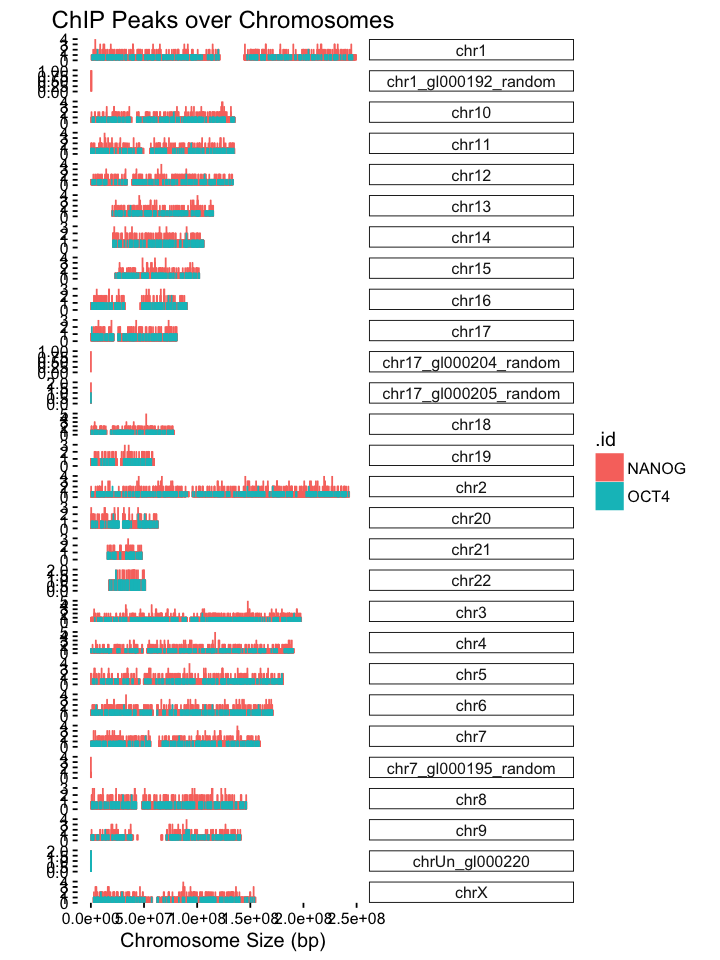

In [20]:
peakBoth = GenomicRanges::GRangesList(NANOG=readPeakFile(peakFile, header=0),
                                      OCT4=readPeakFile(peakFile2,header=0))

p <- covplot(peakBoth)
print(p)

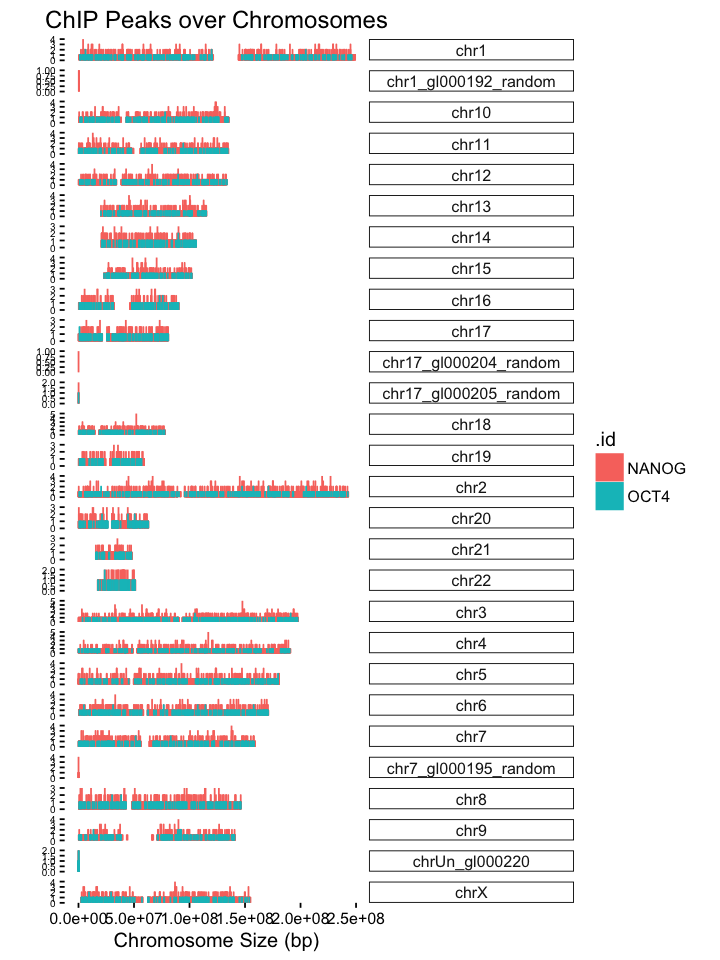

In [21]:
p = p+theme(text = element_text(size=12), axis.text.y  = element_text(size=6))
p

In [26]:
peakAnno <- annotatePeak(peakFile, tssRegion=c(-3000, 3000),
                         TxDb=txdb, annoDb="org.Hs.eg.db")


>> loading peak file...				 2017-05-05 22:29:42 
>> preparing features information...		 2017-05-05 22:29:43 
>> identifying nearest features...		 2017-05-05 22:29:44 
>> calculating distance from peak to TSS...	 2017-05-05 22:29:45 
>> assigning genomic annotation...		 2017-05-05 22:29:45 
>> adding gene annotation...			 2017-05-05 22:30:01 


Loading required package: org.Hs.eg.db

'select()' returned many:many mapping between keys and columns


>> assigning chromosome lengths			 2017-05-05 22:30:16 
>> done...					 2017-05-05 22:30:16 


In [49]:
peakAnno_oct4 <- annotatePeak(peakFile2, tssRegion=c(-3000, 3000),
                         TxDb=txdb, annoDb="org.Hs.eg.db")

>> loading peak file...				 2017-05-05 22:57:57 
>> preparing features information...		 2017-05-05 22:57:57 
>> identifying nearest features...		 2017-05-05 22:57:57 
>> calculating distance from peak to TSS...	 2017-05-05 22:57:57 
>> assigning genomic annotation...		 2017-05-05 22:57:57 
>> adding gene annotation...			 2017-05-05 22:57:59 


'select()' returned many:many mapping between keys and columns


>> assigning chromosome lengths			 2017-05-05 22:58:00 
>> done...					 2017-05-05 22:58:00 


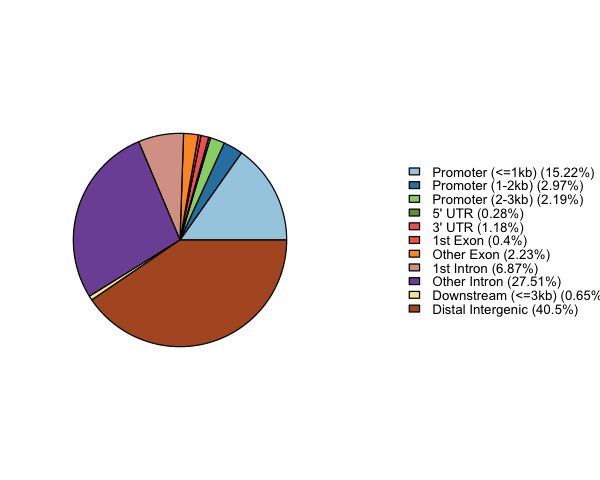

In [32]:
options(repr.plot.width=5, repr.plot.height=4)
par(ps = 8, cex = 2, cex.main = 1)
plotAnnoPie(peakAnno)


In [35]:
ggsave("NANOG.pie.pdf",device = 'pdf')

Saving 7 x 7 in image


In [34]:
help(ggsave)

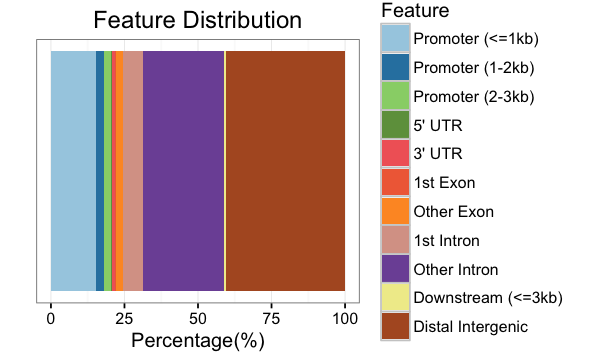

In [36]:
options(repr.plot.width=5, repr.plot.height=3)
par(ps = 4, cex = .1, cex.main = .1)
plotAnnoBar(peakAnno)

In [38]:
ggsave("NANOG.bar.pdf",device = 'pdf',width = 5, height = 3)

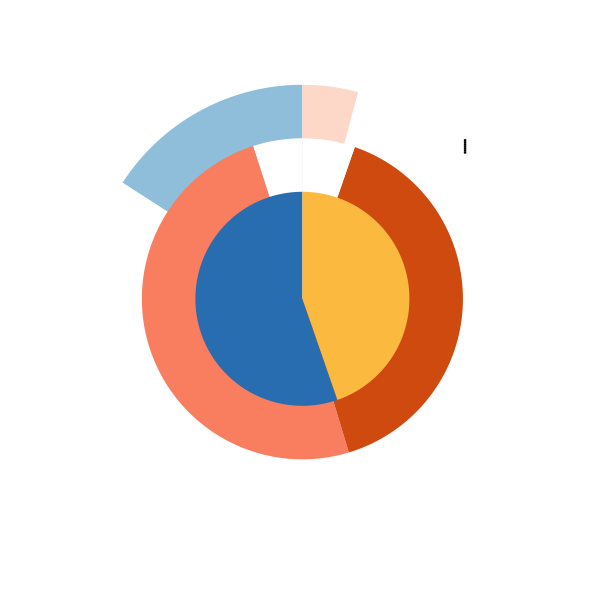

In [42]:
options(repr.plot.width=5, repr.plot.height=5)
par(ps = 1, cex = .1, cex.main = .1)
vennpie(peakAnno)

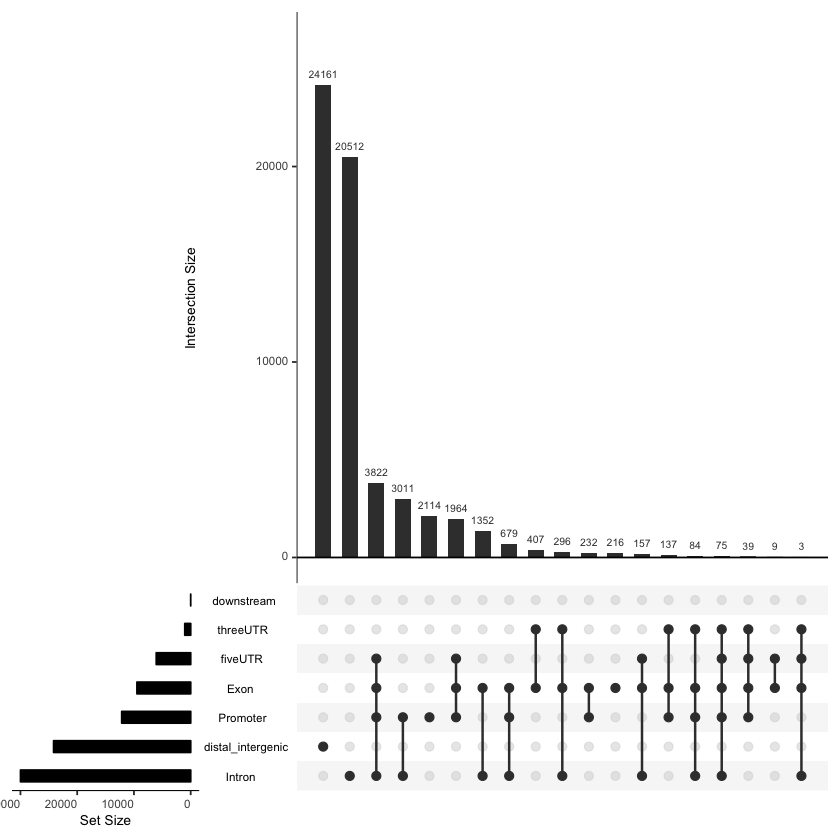

In [11]:
upsetplot(peakAnno)

In [48]:
pdf("Nanog.upset.vennpie.pdf", width = 8, height = 8)
upsetplot(peakAnno,vennpie=TRUE)
dev.off()

pdf 
  2

In [50]:
pdf("Oct4.upset.vennpie.pdf", width = 8, height = 8)
upsetplot(peakAnno_oct4,vennpie=TRUE)
dev.off()

pdf 
  2

Warning message:
“Stacking not well defined when ymin != 0”

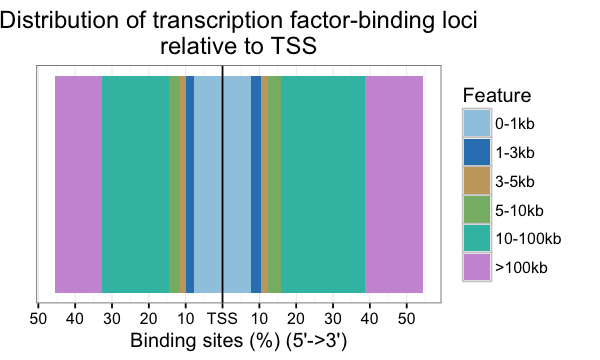

In [54]:
options(repr.plot.width=5, repr.plot.height=3)
#par(ps = 4, cex = .1, cex.main = .1)
plotDistToTSS(peakAnno,
              title="Distribution of transcription factor-binding loci\nrelative to TSS")

In [51]:
nanog = c(peakFile)
oct4 = c(peakFile2)
files = list(nanog=nanog, oct4=oct4)
files

$nanog
[1] "./macs_out_highQuality/NANOG_ChIP_peaks.narrowPeak"

$oct4
[1] "./macs_out_highQuality/OCT4_ChIP_peaks.narrowPeak"

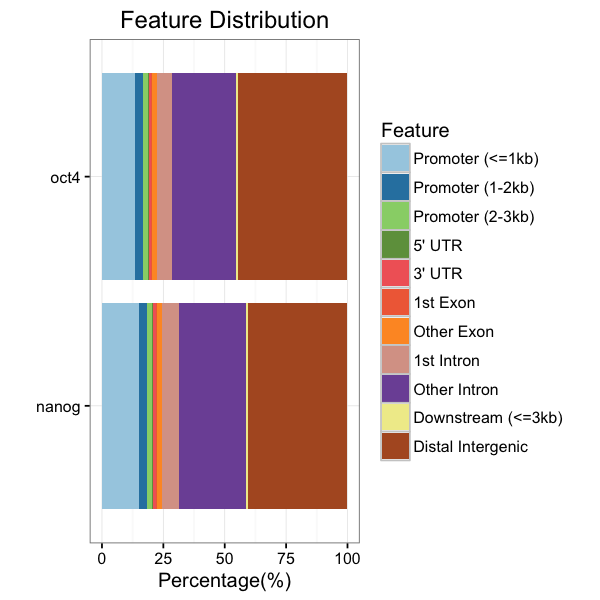

In [52]:
peakAnnoList <- lapply(files, annotatePeak, TxDb=txdb,
                       tssRegion=c(-3000, 3000), verbose=FALSE)
plotAnnoBar(peakAnnoList)

In [53]:
pdf("feature.distribution.pdf", width = 6, height = 5)
plotAnnoBar(peakAnnoList)
dev.off()

pdf 
  2

Warning message:
“Stacking not well defined when ymin != 0”

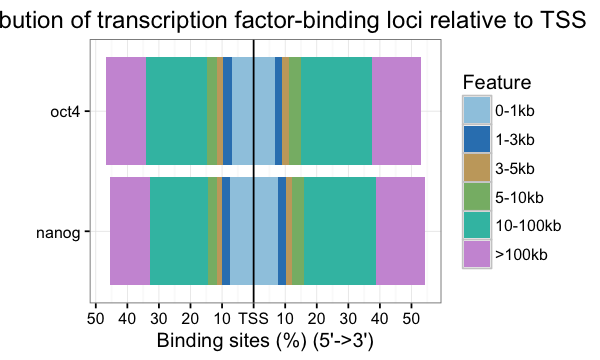

In [54]:
options(repr.plot.width=5, repr.plot.height=3)
plotDistToTSS(peakAnnoList)

In [55]:
pdf("distribution.tf-loci-2tss.pdf", width = 6, height = 3)
plotDistToTSS(peakAnnoList)
dev.off()

Warning message:
“Stacking not well defined when ymin != 0”

pdf 
  2

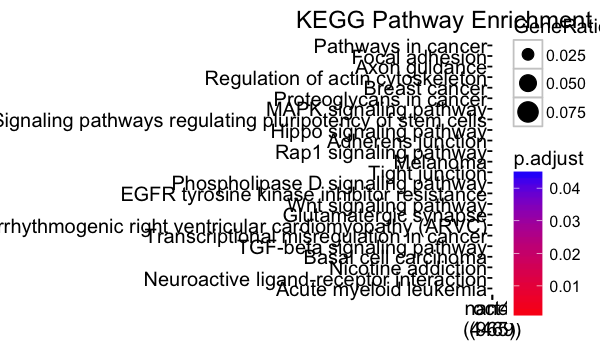

In [56]:
genes = lapply(peakAnnoList, function(i) as.data.frame(i)$geneId)
names(genes) = sub("_", "\n", names(genes))
compKEGG <- compareCluster(geneCluster   = genes,
                         fun           = "enrichKEGG",
                         pvalueCutoff  = 0.05,
                         pAdjustMethod = "BH")

plot(compKEGG, showCategory = 15, title = "KEGG Pathway Enrichment Analysis")

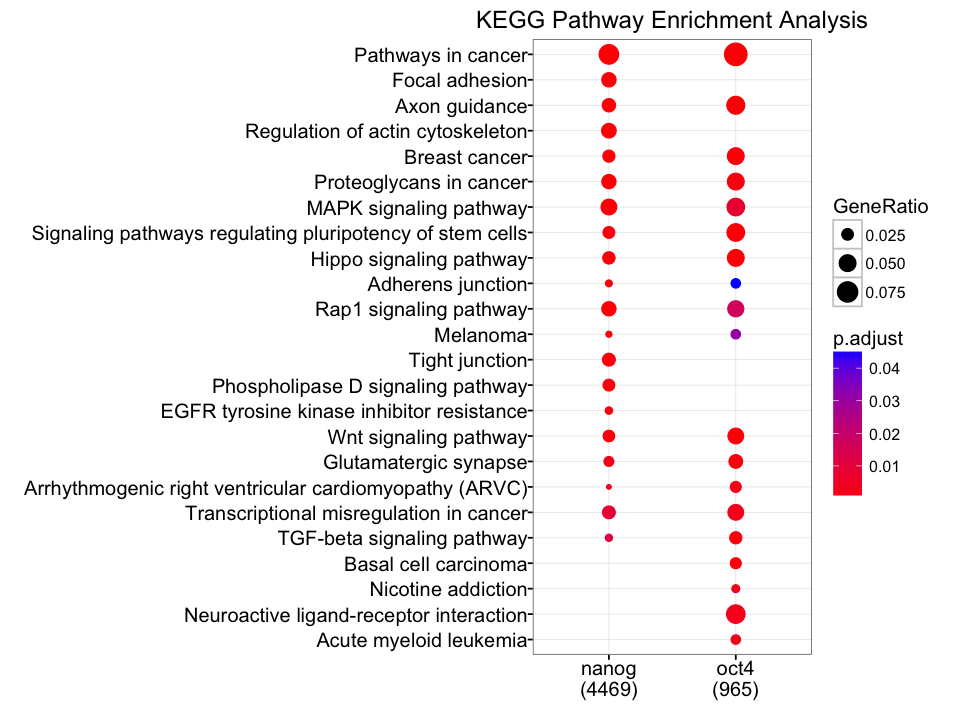

In [59]:
options(repr.plot.width=8, repr.plot.height=6)
par(ps=12,cex=.5)
plot(compKEGG, showCategory = 15, title = "KEGG Pathway Enrichment Analysis")

In [60]:
pdf("KEGG.compared.pdf",width=8, height=6)
par(ps=12,cex=.5)
plot(compKEGG, showCategory = 15, title = "KEGG Pathway Enrichment Analysis")
dev.off()

pdf 
  2

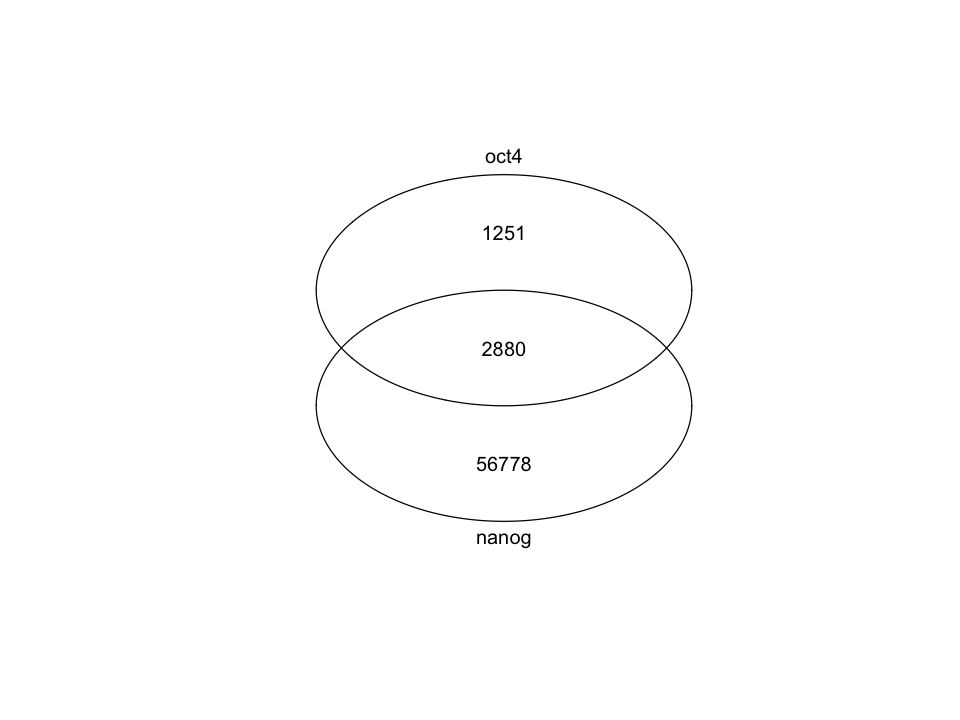

In [61]:
genes= lapply(peakAnnoList, function(i) as.data.frame(i)$geneId)
vennplot(genes)

In [6]:
help(par)

In [8]:
help(covplot)